# Geographical Differences in Happiness

## Introduction

My analysis program seeks to find the average happiness score of each continent in the world and identify the continents with the highest and lowest average happiness scores. The data used in this analysis was sourced from a happiness survey of 155 countries conducted by the United Nations in 2019 (https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv, "World Happiness Ranking 2019"). The happiness score of each country was obtained using a "Cantril Ladder" approach, which asks participants in each country to rate their life satisfaction on a scale from 1 to 10. I find this topic particularly interesting because there is a constant debate about what causes great happiness in individuals – for instance, money, freedom of speech, or resources. The analysis of continents, which is at a much larger scale than individual people, captures all these elements in a similar setting and gives us a better understanding of geographical differences in happiness.

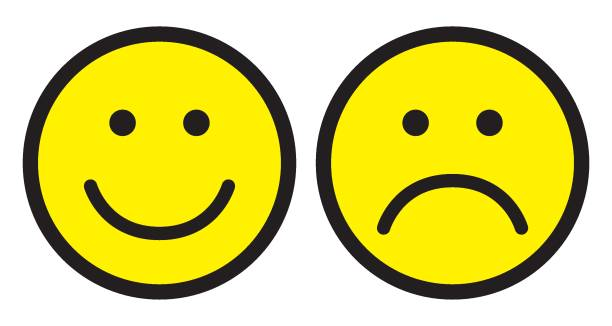

## Design Choices

### Data Definitions
The first step of my analysis program was to create data definitions following the HTDD (How to Design Data) format. I started by designing an enumeration data type, named "WorldContinents", for the continents in the data because there was only 7 continents in the dataset. Following that step, I designed a compound data type named "HappinessData" that contained both the enumeration continent data type and happiness score (represented as a numerical value). I chose to design the compound data type because my program reads 2 columns of the dataset and uses them to complete the analysis. Lastly, I designed lists of WorldContinent and HappinessData data types because they will be the primary inputs for later functions with loops.

Examples of the data types:

```python
WorldContinents.North_America
HappinessData(WorldContinents.South_America, 1)
List[WorldContinents]
List[HappinessData]
```
### Program Design
The overall structure of my program was designed in the following order: the main function for the main call, a file reader function, parse functions, analysis function, and helper function. The order of these functions were designed and organized this way so that it's easier to refer to the helper functions to understand the behaviour of large functions. Furthemore, the complexity of the functions go from top to bottom, thus it is easier to go through the series of code step-by-step and link the large functions with smaller helper functions. 
### Final Product
The complete dataset that I am using for this analysis is in a file named "happiness_data_raw.csv". A call to my main function would be:

```python
main("happiness_data_raw.csv", all_seven_continents)
```
In sum, the "main" function of this program takes in 2 arguments: the file name and the continents of interest. Calling this function will output a bar graph representing the average happiness scores of each continent. The image placed below this markdown cell would be an example of the graph output.

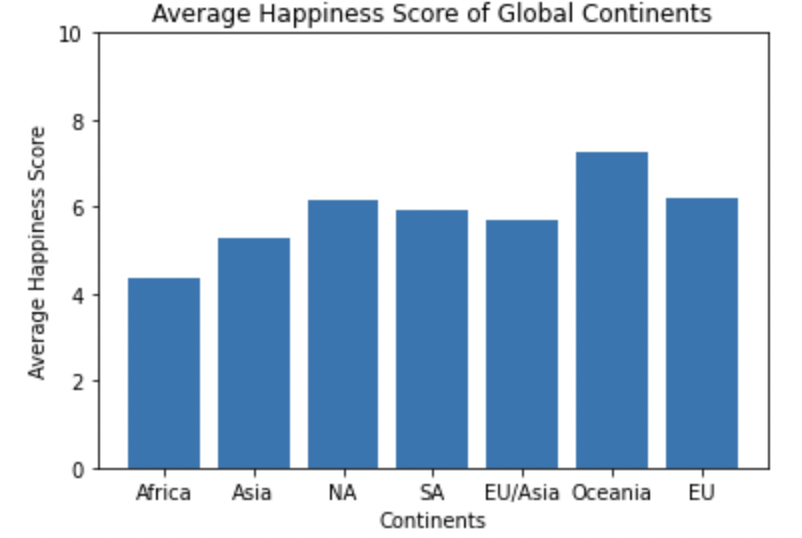

## Program Code

### Required Packages 

In [1]:
from cs103 import *
from typing import NamedTuple, List
from enum import Enum
import csv
from matplotlib import pyplot

### Data Definitions and Function Templates


In [2]:
WorldContinents= Enum("WorldContinents", ["North_America", "South_America", "Africa", "Oceania", 
                                          "Asia", "Europe", "Europe_Asia"])
#Interp. The continents of the world, a continent is one-of North America, South America, Africa, Oceania, Asia, Europe and Europe/Asia (transcontinent)

@typecheck
#function template based on enumeration design
def fn_for_world_continents(wc: WorldContinents)->...:
    if wc == WorldContinents.North_America:
        return ...
    elif wc == WorldContinents.South_America:
        return ...
    elif wc == WorldContinents.Africa:
        return ...
    elif wc == WorldContinents.Oceania:
        return ...
    elif wc == WorldContinents.Asia:
        return ...
    elif wc == WorldContinents.Europe:
        return ...
    elif wc == WorldContinents.Europe_Asia:
        return ...


HappinessData= NamedTuple("HappinessData", [("continent", WorldContinents),
                                            ("score", float)]) #in range of [0,10]

#interp. data of happiness scores from the United Nations, which includes the continent of which the data was collected
#from, and the happiness score collected from participant surveys (the score can not be smaller than 0 or bigger than 10)

#Examples of the data type
HD1= HappinessData(WorldContinents.North_America, 0)
HD2= HappinessData(WorldContinents.South_America, 1.3)
HD3= HappinessData(WorldContinents.Asia, 10)
HD4= HappinessData(WorldContinents.Asia, 2.3)

@typecheck
#function template based on compound and reference rule
def fn_for_happiness_data(hd: HappinessData)->...:
    return... (fn_for_world_continents(hd.continent), 
               hd.score)


Now that I have designed the data definitions for WorldContinents and HappinessData, I need to create a arbritrary-sized data template in the format of List[The type of data designed]. This arbitrary-sized data type will represent an unknown amount of WorldContinents and HappinessData.

In [3]:
#List[WorldContinents]
#interp. a list of WorldContinents
LOWC0= []
LOWC1= [WorldContinents.North_America]
LOWC2= [WorldContinents.North_America, WorldContinents.Africa, WorldContinents.Asia]

@typecheck
#template based on arbritary sized and reference rule
def fn_for_lowc(lowc:List[WorldContinents] )-> ...:
    # description of accumulator
    acc = ... # type: ...
    
    for wc in lowc:
        acc = ...(fn_for_world_continents(wc), acc)
        
    return ...(acc)       

# List[HappinessData]
# interp. a list of HappinessData
LOHD0 = []
LOHD1 = [HD1]
LOHD2 = [HD1, HD2, HD3]

@typecheck
#template based on arbritary sized and reference rule
def fn_for_lod(lod: List[HappinessData]) -> ...:
    # description of accumulator
    acc = ... # type: ...
    
    for hd in lod:
        acc = ...(fn_for_happiness_data(hd), acc)
        
    return ...(acc)   


### Analysis Program functions

In [4]:
@typecheck
def main(filename: str, focal_continents: List[WorldContinents]) -> None:
    """
    Reads the file from given filename, analyzes the data, and returns a bar graph with 
    the average happiness score of each input continent 
    """
    # Template from HtDAP, based on function composition 
    return average_score_graph(read(filename), focal_continents) 
    
@typecheck
def read(filename: str) -> List[HappinessData]:
    """    
    Reads information from the specified file and returns a list of happiness data that contains the continent 
    of the country at which the data was surveyed from (in a WorldContinent data type form), and the surveyed 
    happiness score
    """
    # Template from HtDAP
    # lohd contains the result so far
    lohd = [] # type: List[HappinessData]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            hd = HappinessData(parse_continents(row[2]), parse_float(row[3]))
            lohd.append(hd)
    
    return lohd

@typecheck
def parse_continents(continent:str)-> WorldContinents:
    """
    Convert the strings "Africa", "Europe", "Asia", "North America", "South America", "Oceania", "Europe/Asia" 
    into a WorldContinent data type
    """
    #template based on atomic non-distinct
    if continent == "Africa":
        return WorldContinents.Africa
    elif continent == "Europe":
        return WorldContinents.Europe
    elif continent == "Asia":
        return WorldContinents.Asia
    elif continent == "North America":
        return WorldContinents.North_America
    elif continent == "South America":
        return WorldContinents.South_America
    elif continent == "Oceania":
        return WorldContinents.Oceania
    elif continent == "Europe/Asia":
        return WorldContinents.Europe_Asia

@typecheck
def average_score_graph(lohd: List[HappinessData], focal_continents:List[WorldContinents]) -> None: 
    """ 
    Produces a bar graph visualization with one bar for each input continent. Each bar in the graph will represent
    the mean happiness score of the input continent, which will be in between 0-10
    """ 
    #template based on visualization
    x_values= convert_worldcontinent_list(focal_continents)
    y_values= average_for_continents(lohd, focal_continents)
    
    #set the x-axis label, y-axis label, and plot title
    pyplot.xlabel('Continents')
    pyplot.ylabel('Average Happiness Score')
    pyplot.title('Average Happiness Score of Global Continents')
    
    #plot data
    pyplot.bar(x_values, y_values)
    
    #set y-axis restrictions
    pyplot.ylim([0,10])
    
    #show plot
    pyplot.show()
    
    return None

@typecheck
def convert_worldcontinent_list(continent_list:List[WorldContinents])-> List[str]:
    """
    Returns a list of strings that translates a list of WorldContinent data types into human-readable text. 
    This step ensures proper interpretation of the x-axis in the visualization. Additionally, this function
    abbreviates long-named continents so that they don't overlap and block each other in the graph
    """
    #template copied from List[WorldContinents]
    #accumulator stores the converted string so far
    acc=[] #type:[str]
    for wc in continent_list:
        converted_text= convert_to_string(wc)
        acc.append(converted_text)
    return acc

@typecheck
def convert_to_string(continent:WorldContinents)-> str:
    """
    Returns the string that has been converted by the self-defined WorldContinent data type
    """
    #template copied from WorldContinents
    if continent == WorldContinents.North_America:
        return "NA"
    elif continent == WorldContinents.South_America:
        return "SA"
    elif continent == WorldContinents.Africa:
        return "Africa"
    elif continent == WorldContinents.Oceania:
        return "Oceania"
    elif continent == WorldContinents.Asia:
        return "Asia"
    elif continent == WorldContinents.Europe:
        return "EU"
    elif continent == WorldContinents.Europe_Asia:
        return "EU/Asia"
    
@typecheck
def average_for_continents(lohd: List[HappinessData], focal_continents:List[WorldContinents])-> List[float]:
    """
    Obtain the average happiness score of each input of the continent list and append each average score in 
    a list. The end of this function will return the list of average scores
    """
    #template copied from List[WorldContinents] with an additional parameter
    #accumulator stores the average score of each continent so far
    acc=[] #type: List[float]
    for continent in focal_continents:
        continent_average= get_continent_average(lohd, continent)
        acc.append(continent_average)
    return acc

@typecheck
def get_continent_average(lohd: List[HappinessData], continent: WorldContinents)-> float:
    """
    Obtain the average happiness score of the input continent
    """
    #template based on composition
    #plan:
    #step 1. filter happiness data by the input continent
    #step 2. calculate the average happiness score of the filtered data
    data_by_continent= filter_by_continent( lohd ,continent)
    average_score_by_continent= get_average_score(data_by_continent)
    return average_score_by_continent

@typecheck
def filter_by_continent(lohd: List[HappinessData], continent: WorldContinents)-> List[HappinessData]:
    """
    Return a list of happiness data that has been filtered by the input continent
    """
    #template copied from List[Happiness Data] with an additional parameter
    #accumulator stores the appended list of HappinessData that fits the continent criteria
    acc= [] #type: List[HappinessData]
    for hd in lohd:
        if correct_continent(hd, continent):
            acc.append(hd)
    return acc

@typecheck
def correct_continent(happiness_data: HappinessData, continent: WorldContinents)-> bool:
    """
    Return true if the happiness data was collected from the same continent as the input continent
    """
    #template copied from HappinessData with an additional parameter
    return (is_same_continent(happiness_data.continent, continent))

@typecheck
def is_same_continent(continent1: WorldContinents, continent2: WorldContinents)-> bool:
    """
    Return true if two continents, which are both WorldContinent data types, are equivalent 
    """
    #template copied from WorldContinents with an additional parameter
    if continent1 == WorldContinents.North_America:
        return (continent2 == WorldContinents.North_America)
    elif continent1 == WorldContinents.South_America:
        return (continent2 == WorldContinents.South_America)
    elif continent1 == WorldContinents.Africa:
        return (continent2 == WorldContinents.Africa)
    elif continent1 == WorldContinents.Oceania:
        return (continent2 == WorldContinents.Oceania)
    elif continent1 == WorldContinents.Asia:
        return (continent2 == WorldContinents.Asia)
    elif continent1 == WorldContinents.Europe:
        return (continent2 == WorldContinents.Europe)
    elif continent1 == WorldContinents.Europe_Asia:
        return (continent2 == WorldContinents.Europe_Asia)
    
@typecheck
def get_average_score(lohd: List[HappinessData])-> float:
    """
    return the average happiness score by adding the scores together and dividing the summed score by the number
    of times the loop goes through the list
    """
    #template copied from List[HapppinessData]
    #first accumulator stores the summed happiness score so far
    #second accumulator stores the number of times the for loop iterates through the data
    summed_scores= 0 #type: float
    iterations= 0 #type: int
    for hd in lohd:
        summed_scores= summed_scores + get_score(hd)
        iterations= iterations+ 1
    if iterations==0:
        return 0
    else:
        return summed_scores/iterations
        
@typecheck
def get_score(happiness_data: HappinessData)-> float:
    """
    return the happiness score of the HappinessData
    """
    #template copied from HappinessData
    return happiness_data.score

### Function Tests

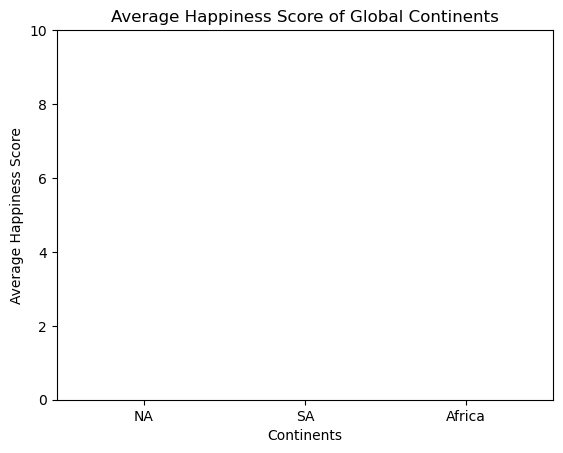

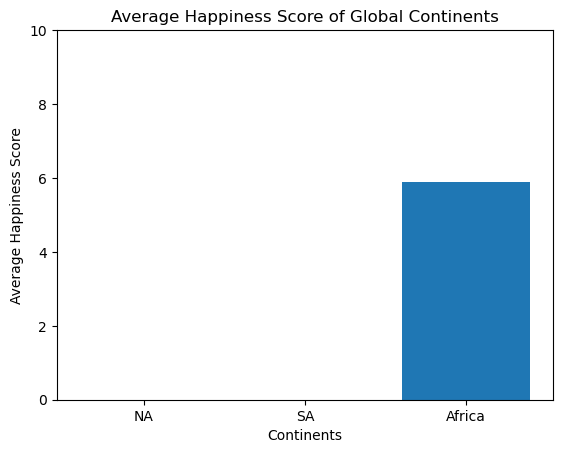

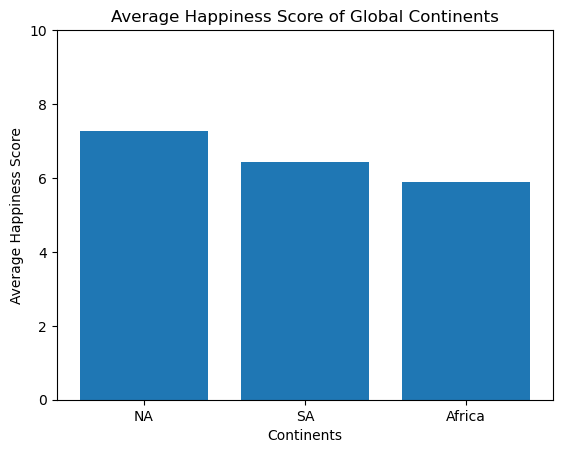

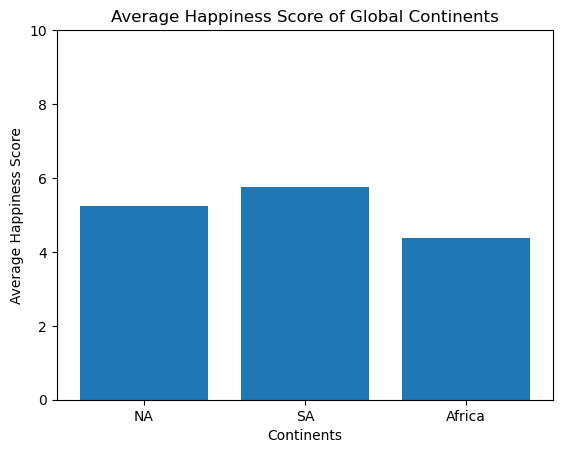

4 of 4 tests passed
3 of 3 tests passed
7 of 7 tests passed


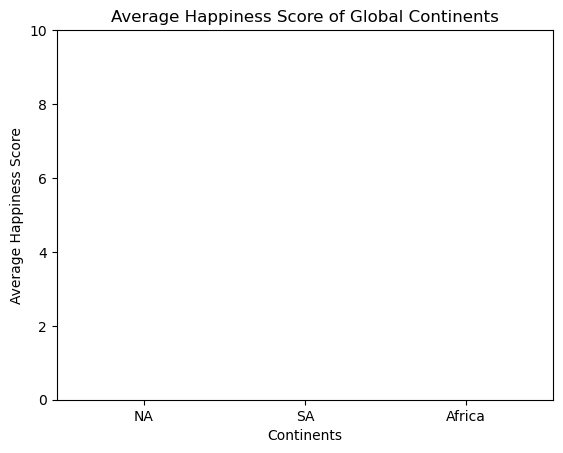

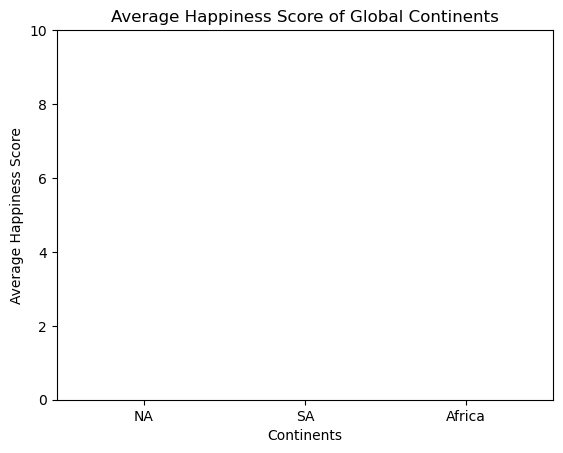

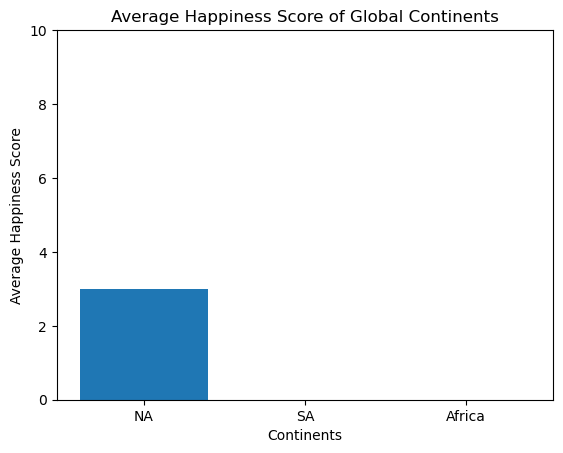

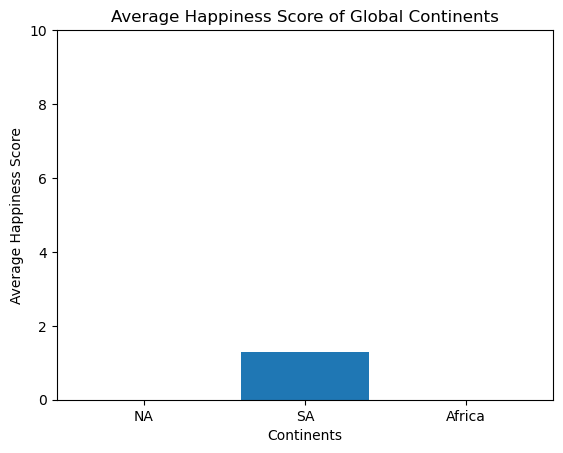

4 of 4 tests passed
3 of 3 tests passed
7 of 7 tests passed
5 of 5 tests passed
4 of 4 tests passed
6 of 6 tests passed
2 of 2 tests passed
14 of 14 tests passed
3 of 3 tests passed
3 of 3 tests passed


In [6]:
start_testing()
test_continents= [WorldContinents.North_America, WorldContinents.South_America, WorldContinents.Africa]
# Examples and tests for main function
#empty graph,however, expect 3 continents on the x-axis
expect(main("happiness_data_empty.csv", test_continents), None)
#graph with one bar for Africa and expect the bar to be at 5.888,however, also expect 3 continents on the x-axis
expect(main("happiness_data_subset1.csv", test_continents), None)
#graph with 3 bars (1 for NA, SA, and Africa), expect the bars to be at 7.278, 6.444, 5.888 respectively
expect(main("happiness_data_subset2.csv", test_continents), None)
##graph with 3 bars (1 for NA, SA, and Africa), expect the bars to be at 5.2445, 5.743, and 4.3705 respectively 
expect(main("happiness_data_subset3.csv", test_continents), None)
summary()

start_testing()

# Examples and tests for read function
expect(read("happiness_data_empty.csv"), [])
expect(read("happiness_data_subset1.csv"), [HappinessData(WorldContinents.Africa, 5.888)])  
expect(read("happiness_data_subset2.csv"), [HappinessData(WorldContinents.Africa, 5.888),
                                            HappinessData(WorldContinents.Asia, 6.825),
                                            HappinessData(WorldContinents.Europe, 7.769),
                                            HappinessData(WorldContinents.North_America, 7.278),
                                            HappinessData(WorldContinents.Oceania, 7.228),
                                            HappinessData(WorldContinents.South_America, 6.444),
                                            HappinessData(WorldContinents.Europe_Asia, 5.718)])                               
summary()

start_testing()
#Examples and tests for parse function
start_testing()
expect(parse_continents("Africa"), WorldContinents.Africa)
expect(parse_continents("Europe"), WorldContinents.Europe)
expect(parse_continents("Asia"), WorldContinents.Asia)
expect(parse_continents("North America"), WorldContinents.North_America)
expect(parse_continents("South America"), WorldContinents.South_America)
expect(parse_continents("Oceania"), WorldContinents.Oceania)
expect(parse_continents("Europe/Asia"), WorldContinents.Europe_Asia)
summary()

start_testing()
#Examples and tests for average_continent_score function (produces bar graph)

#graph with no visible bars, however, expect 3 continents on the x-axis
expect(average_score_graph([],test_continents), None)
#graph with one bar for North America that has a bar height of 0, however, expect 3 continents on the x-axis
expect(average_score_graph([HappinessData(WorldContinents.North_America, 0)],test_continents), None)
#graph with one bar for North America that has a bar height of 3, however, expect 3 continents on the x-axis
expect(average_score_graph([HappinessData(WorldContinents.North_America, 2),
                           HappinessData(WorldContinents.North_America, 4)],
                           test_continents), None)
#graph with 2 bars for North America and South America, with bar heights of 0 , 1.3 respectively
#however, expect 3 continents on the x-axis
expect(average_score_graph([HD1, HD2, HD3], test_continents), None)
summary()

start_testing()
#Examples and tests for convert_worldcontinent_list
expect(convert_worldcontinent_list([]),[])
expect(convert_worldcontinent_list([WorldContinents.Asia]),["Asia"])
expect(convert_worldcontinent_list([WorldContinents.Asia, WorldContinents.Europe, WorldContinents.Africa]),
       ["Asia", "EU", "Africa"])
summary()

start_testing()
#Example and tests for convert_to_string, 7 tests in total for enumerations
expect(convert_to_string(WorldContinents.Africa), "Africa")
expect(convert_to_string(WorldContinents.Asia), "Asia")
expect(convert_to_string(WorldContinents.North_America), "NA")
expect(convert_to_string(WorldContinents.South_America), "SA")
expect(convert_to_string(WorldContinents.Oceania), "Oceania")
expect(convert_to_string(WorldContinents.Europe), "EU")
expect(convert_to_string(WorldContinents.Europe_Asia), "EU/Asia")
summary()

start_testing()
#Example and tests for average_for_continents function
expect(average_for_continents([], test_continents), [0,0,0])
expect(average_for_continents([HD1], test_continents), [0,0,0])
expect(average_for_continents([HD1, HD2, HD3], test_continents), [0, 1.3,0])
expect(average_for_continents([HD1, HD2, HD3], [WorldContinents.Africa]), [0])
expect(average_for_continents([HD1, HD2, HD3, HD4], [WorldContinents.Oceania, WorldContinents.Asia]), 
       [0, (10+2.3)/2])
summary()

start_testing()
#Examples and tests for get_happiness_average
expect(get_continent_average([], WorldContinents.North_America),0)
expect(get_continent_average([HD1], WorldContinents.South_America),0)
expect(get_continent_average([HD1], WorldContinents.North_America),0)
expect(get_continent_average([HD1, HD2, HD3, HD4], WorldContinents.Asia), (HD3.score+HD4.score)/2)
summary()

start_testing()
#Examples and tests for continent filter
expect(filter_by_continent([],WorldContinents.North_America ), [])
expect(filter_by_continent([HD1], WorldContinents.North_America), [HD1])
expect(filter_by_continent([HD1], WorldContinents.South_America), [])
expect(filter_by_continent([HD1, HD2, HD3], WorldContinents.South_America), [HD2])
expect(filter_by_continent([HD1, HD2, HD3], WorldContinents.Africa), [])
expect(filter_by_continent([HD1, HD2, HD3, HD4], WorldContinents.Asia), [HD3, HD4])
summary()

start_testing()
#Examples and tests for checking continent equivalency
expect(correct_continent(HD1, WorldContinents.North_America), True)
expect(correct_continent(HD1, WorldContinents.South_America), False)
summary()

start_testing()
#Examples and tests for is_same_continent, minimum 7 tests for enumeration
expect(is_same_continent(WorldContinents.North_America, WorldContinents.North_America), True)
expect(is_same_continent(WorldContinents.Africa, WorldContinents.Africa), True)
expect(is_same_continent(WorldContinents.Europe, WorldContinents.Europe), True)
expect(is_same_continent(WorldContinents.South_America, WorldContinents.South_America), True)
expect(is_same_continent(WorldContinents.Asia, WorldContinents.Asia), True)
expect(is_same_continent(WorldContinents.Oceania, WorldContinents.Oceania), True)
expect(is_same_continent(WorldContinents.Europe_Asia, WorldContinents.Europe_Asia), True)
expect(is_same_continent(WorldContinents.North_America, WorldContinents.Europe_Asia), False)
expect(is_same_continent(WorldContinents.Africa, WorldContinents.Europe_Asia), False)
expect(is_same_continent(WorldContinents.Europe, WorldContinents.Europe_Asia), False)
expect(is_same_continent(WorldContinents.South_America, WorldContinents.Europe_Asia), False)
expect(is_same_continent(WorldContinents.Asia, WorldContinents.Europe_Asia), False)
expect(is_same_continent(WorldContinents.Oceania, WorldContinents.Europe_Asia), False)
expect(is_same_continent(WorldContinents.Europe_Asia, WorldContinents.Oceania), False)
summary()

start_testing()
#Examples and tests for average score function
expect(get_average_score([]), 0)
expect(get_average_score([HD2, HD3]), (1.3+10)/2)
expect(get_average_score([HD1, HD2, HD3]), (0+1.3+10)/3)
summary()

start_testing()
#Examples and tests for get_score function
expect(get_score(HD1), HD1.score)
expect(get_score(HD2), HD2.score)
expect(get_score(HD3), HD3.score)
summary()

### Final Graph

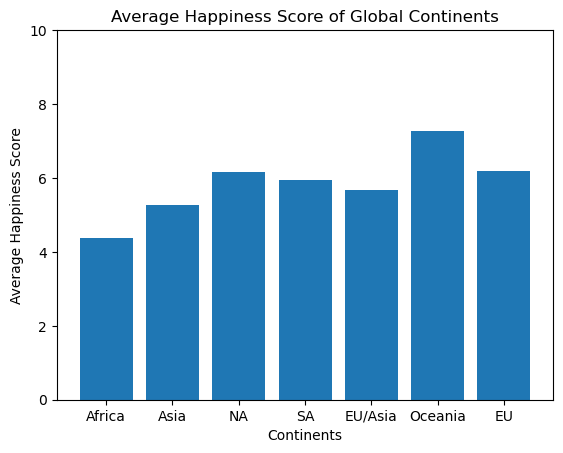

In [7]:
all_seven_continents= [WorldContinents.Africa, WorldContinents.Asia, WorldContinents.North_America, 
                 WorldContinents.South_America, WorldContinents.Europe_Asia, WorldContinents.Oceania,
                WorldContinents.Europe]
#the defined list contains all 7 continents that will be used to complete the final analysis

main("happiness_data_raw.csv", all_seven_continents)

### Conclusion
The analysis program that I designed reveals the average happiness scores of each continent in 2019. In that year, Oceania had the highest average happiness score out of all the continents, whereas Africa had the lowest average happiness score. The skills I developed in this project could be utilized to answer other research questions that involve datasets from happiness surveys. For instance, instead of analyzing an entire continent, I could focus on a specific continent of interest and create a histogram to display the distribution of happiness scores among countries within that continent. This histogram would allow me to visualize the variation in happiness scores or any skewness present in the data.

Furthermore, exploring the correlation between happiness scores and a factor such as GDP would be intriguing. Plotting happiness scores against GDP could reveal the relationship between these two variables and the strength of their correlation. These additional ideas would build upon the design approach used in this project and provide a more comprehensive understanding of the geographical differences in happiness.